# Week 8-PSC-questions

## Q1: plot stress-strain curve

A dogbone sample is given below, the key paramters we will use are the gauage length, gauge width, sample thickness. See the figure below:

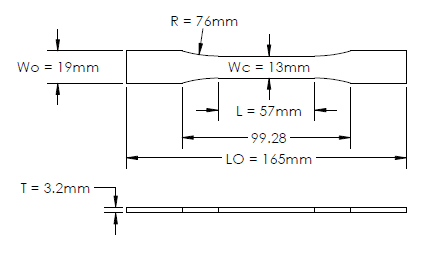

The data is given in a file called "data-Q1.csv", note that the column names are "Extension" and "Load". Now plot stress-strain curve and determine the ultimate tensile strength (the maximum strength). 

In [1]:
### Your code ###
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dir = './' # current working directory (cwd)
data = pd.read_csv(dir+'data_Q1.csv') 

# Reading data from csv
Force = data.Load.astype(float) # storing the Load column as a float type in 
Displacement = data.Displacement.astype(float)

In [2]:
# Defining parameters
l0 = 57 # initial length in mm
w0 = 13 # gauge width in mm
t = 3.2 # thickness in mm

## force to stress
# finding the area
A = w0*t # area on which the load is acting on
stress = Force/A # N/mm^2 so stress is in MPa

## displacement to strain
strain = Displacement / l0 # mm/mm so dimensionless 


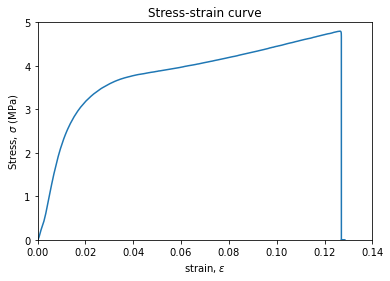

In [3]:
# plotting figure

fig, ax = plt.subplots()
ax.plot(strain, stress)  # Strain is the x-axis data and stress is y-axis data
ax.set_xlim(0, 0.14)  # Set the limit of x axis
ax.set_ylim(0, 5)  # Set the limit of y axis

# Add axis labels, title
ax.set(xlabel= r"strain, $\epsilon$", ylabel=r"Stress, $\sigma$ (MPa)",
       title='Stress-strain curve')
plt.show()

In [4]:
# finding the UTS
print('Ultimate Tensile Strength is', str(max(stress)), 'MPa')

Ultimate Tensile Strength is 4.798894951923077 MPa


## Q2: plot the polygon

Define a function to plot polygon with random number $n$ of sides:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

def polygon(n):

    ## Your code below
    t = np.arange(0,360+(360/(n)),360/(n))
    x = 10*np.sin(np.radians(t))
    y=10*np.cos(np.radians(t))    
    plt.plot(x,y)
    plt.axis('equal')
    
interactive_plot = interactive(polygon , n= (3,20))
interactive_plot 

interactive(children=(IntSlider(value=11, description='n', max=20, min=3), Output()), _dom_classes=('widget-in…

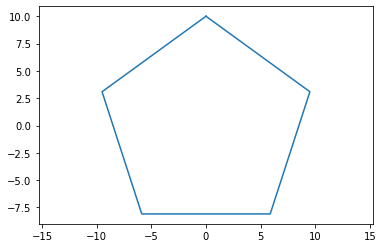

In [2]:
## Now call the function Polygon(n)
# n = enter the no. of sides greater than 2: '))
polygon(5)

### Extra challenge: Design a program to determine the Young's Modulus and 0.2% offset Yield strength automatically?

Hints: 

(1) Find the data range that covers the linear elastic part of the stress-strain curve, Pandas has this nice little method .between(). We can set lower and upper limits from the stress series and then use this to index out of both the stress and the strain series in the linear elastic region. For example: E_stress = stress[stress.between(a,b)], $a$ and $b$ is the lower and upper bound, which will be defined by you. 

(2) Then, you can use the scipy's linear regression function called linregress() to calculate the slope in the linear elastic region. The slope will be the Young's moduls $E$.

(3) Now to determine the 0.2% offset yield strength, we will add a 0.002 or 0.2 % offset line to our plot. We will create a new linear series using the general form:

$$ y = mx + b $$
$y$ will be the $\sigma$ value, $x$ will be the offset strain values ($\epsilon - 0.002$), $m$ (the slope) is the elastic modulus $E$, and $b$ is the y-intercept. Adapting $y = mx + b$ to our 0.002 off-set line looks like the equation below.

$$ \sigma_{offset} = E (\epsilon - 0.002) + 0 $$
We can code $\sigma_{offset}$ line into a new series based on the equation above. 

Now that the stress_offset series is defined, we can add our stress_offset line to the plot. When we call the plt.plot() command, we will pass in two x-y pairs. The first x-y pair is strain_Al, stress_Al, the second x-y pair is strain_Al, stress_offset.

Then you need to find the intersection point bewteen the original stress-strain curve and the elastic offset-line. Either from the figure directly, or use an algorthim (for example: https://www.py4u.net/discuss/186536) to find the 0.2% offset yielding point. 

In [5]:
## Your code ###
!pip install shapely

from shapely.geometry import LineString
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

dir = './' # current working directory (cwd)
df = pd.read_csv(dir+'data_Q1.csv') 

df['Stress'] = stress
df['Strain'] = strain

# change the strain intervals such that the range covers the elastic region of the stress-strain curve
a = 0
b = 0.01 
mid = df[df['Strain'].between(a, b)] # obtain all values that lies in between the intervals a <= strain <= b

# storing the resulting values into x and y variables
x = mid.Strain
y = mid.Stress


In [6]:
# range fitting using linear regression

fit = stats.linregress(x,y) # fitting the x and y data found above
modulus = fit.slope # accessing the slope i.e. the modulus of linear line
print(modulus,'MPa')

235.47789761560514 MPa


In [7]:
# calculating the offset stress
offset = 0.2/100

sigma_offset = modulus*(strain - offset)

(0.0, 5.0)

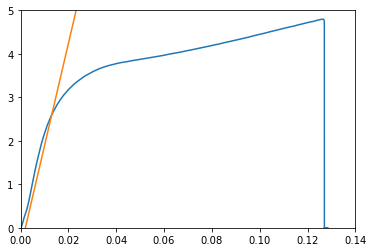

In [8]:
# plotting
fig, ax = plt.subplots()
ax.plot(strain, stress) 
ax.plot(strain,sigma_offset)

ax.set_xlim(0, 0.14) 
ax.set_ylim(0, 5)  

In [9]:
# finding the intersection
from shapely.geometry import LineString

line_1 = LineString(np.column_stack((stress, strain)))
line_2 = LineString(np.column_stack((sigma_offset, strain)))
intersection = line_1.intersection(line_2)

x, y = intersection.xy

print(x,y)

array('d', [2.5969038358116934]) array('d', [0.013028227541129518])
